In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)

# Modelos de regresión

EL primer algoritmo que se estudiará será el más sencillo de todos, la regresión lineal por medio de los mínimos cuadrados.
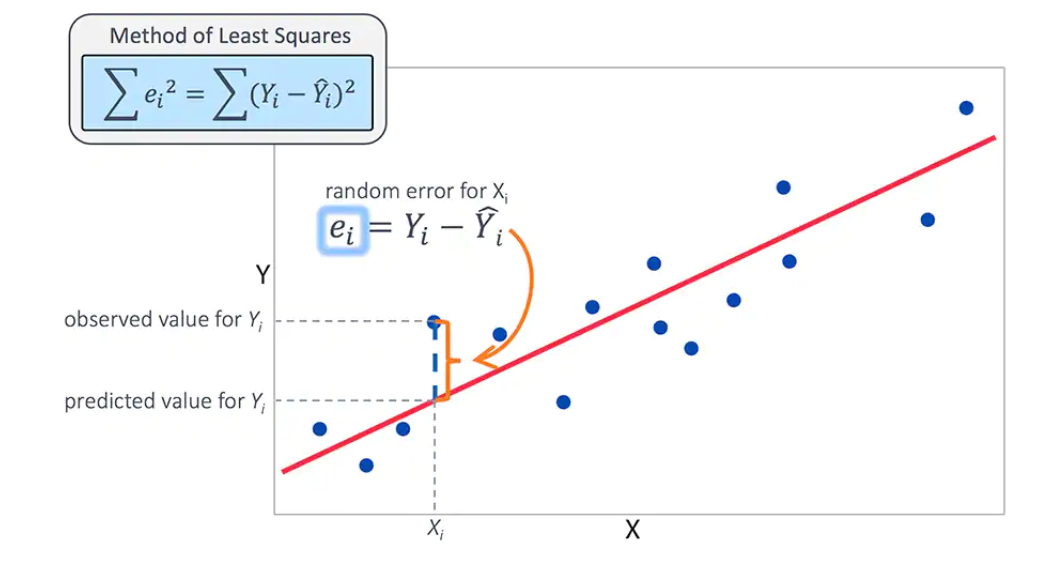

 A continuación se presenta entonces la aplicación de los anteriores conceptos para crear un modelo de Machine Learning. Para esto se utilizará la base de datos de automóviles que se ha venido utilizando.

In [22]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [23]:
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [24]:
# Una pequeña limpieza
# Columnas del DataFrame
df.columns = df.columns.str.replace("-", "_")
df.columns

Index(['symboling', 'normalized_losses', 'make', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'city_L/100km', 'horsepower_binned', 'diesel', 'gas'],
      dtype='object')

In [25]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [26]:
# 1.
# Separemos los datos en features y label
# Features
X = df['engine_size'].values.reshape(-1,1)

# Label
y = df['price'].values.reshape(-1,1)

In [27]:
X.shape, y.shape

((196, 1), (196, 1))

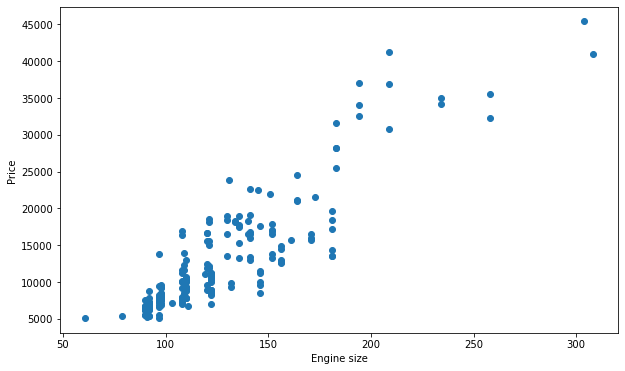

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y)

ax.set_xlabel(f"Engine size")
ax.set_ylabel(f"Price")
plt.show()

In [29]:
# 2.
# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
len(X), len(X_train), len(X_test)

(196, 156, 40)

In [31]:
print(f"Porcentaje datos de prueba = {len(X_test)/len(X)*100: .2f}%")

Porcentaje datos de prueba =  20.41%


In [32]:
# 3. 
# Estimador y predictor
linear  = LinearRegression()

# 4. Entrenamiento/Estimación
linear.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predictor
# Luego se pueden realizar predicciones
# Predicción para los datos de entrenamiento
y_pred = linear.predict(X_train)

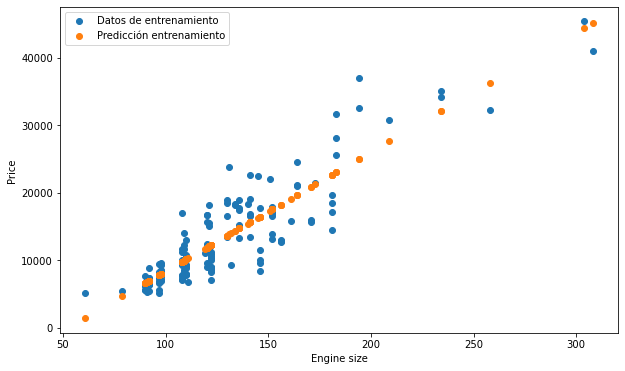

In [34]:
# Representación gráfica de la predicción
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_train, y_train, label="Datos de entrenamiento")
ax.scatter(X_train, y_pred,  label="Predicción entrenamiento")

ax.set_xlabel(r'Engine size')
ax.set_ylabel(r'Price')
plt.legend()
plt.show()

In [35]:
# Métricas de la predicción
print(f"R2_train = {linear.score(X_train, y_train)}")
print(f"R2_test  = {linear.score(X_test, y_test)}")

R2_train = 0.804943390315435
R2_test  = 0.751697634271145


In [36]:
help(linear.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, whe

In [37]:
# Los coeficientes (parámetros del modelo) de la regreción lineal
print(f"m = {linear.coef_}")
print(f"b = {linear.intercept_}")

m = [[177.04702607]]
b = [-9384.74578035]


In [38]:
y_pred_test = linear.predict(X_test)
y_pred_test

array([[ 9736.33303568],
       [ 6549.48656634],
       [27618.0826692 ],
       [18234.59028726],
       [ 7965.86277494],
       [15578.88489614],
       [ 6903.58061849],
       [12214.99140073],
       [ 6549.48656634],
       [20890.29567837],
       [ 7965.86277494],
       [27618.0826692 ],
       [16464.12002651],
       [23014.85999127],
       [12214.99140073],
       [ 7965.86277494],
       [ 6903.58061849],
       [ 9736.33303568],
       [12214.99140073],
       [15578.88489614],
       [ 6549.48656634],
       [22660.76593912],
       [ 9736.33303568],
       [36293.38694685],
       [ 7788.81574887],
       [15401.83787007],
       [12037.94437465],
       [ 7788.81574887],
       [ 6903.58061849],
       [ 6903.58061849],
       [ 8851.09790531],
       [24962.37727808],
       [ 7788.81574887],
       [ 6549.48656634],
       [ 9736.33303568],
       [22660.76593912],
       [12214.99140073],
       [ 6549.48656634],
       [13985.46166147],
       [18234.59028726]])

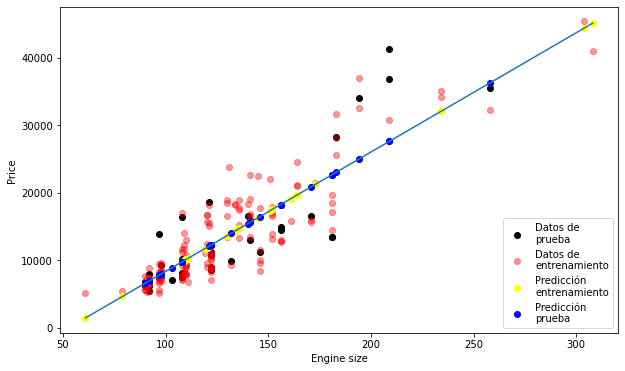

In [39]:
# Representación gráfica de la predicción + datos de prueba
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X_test,  y_test,  color='black', label=f'Datos de\nprueba')
ax.scatter(X_train, y_train, color='red',   label=f'Datos de\nentrenamiento', alpha=0.4)
ax.scatter(X_train, y_pred,  color='yellow',   label=f'Predicción\nentrenamiento')
ax.scatter(X_test,  y_pred_test, color='blue', label=f'Predicción\nprueba')

x = np.linspace(min(X)[0], max(X)[0], 100)
ax.plot(x, (linear.coef_[0][0]*x + linear.intercept_[0]) )

plt.legend(loc='lower right')
ax.set_xlabel(r'Engine size')
ax.set_ylabel(r'Price')
plt.show()